# Author: Joseph Vargovich

In [23]:
# Import libraries
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as m

# Exercise 1 - Using the trees data set, fit the regression model that uses the tree Height to explain the Volume of wood harvested from the tree.

In [ ]:
#Load the trees dataset
trees = pd.read_csv("trees.csv")

trees.head()

#a. Make a scatter plot of the data
scatterPlot = trees.plot.scatter(x = 'Height', y = 'Volume', c = 'DarkBlue' )

#b.  Create a linear regression model for the dataframe.
Volume, Height = dmatrices('Volume ~ Height', data=trees, return_type='dataframe')
model = sm.OLS(Volume, Height)
fitModel = model.fit()


#c. Print out the table of coefficient names, estimated value, std error, and upper/lower CI with any other relevant info.
#Use the summary command
print(fitModel.summary())

#d. Add model fitted values to the trees data frame along with the regression model confidence intervals

#Get the prediction standard as well as the lower and upper confidence intervals.
prstd, iv_l, iv_u = wls_prediction_std(fitModel)

# Make new columns for the fittedValues and CIs. 
trees['resid'] = fitModel.resid
trees['fittedVals'] = fitModel.fittedvalues
trees['lwrCI'] = iv_l
trees['uprCI'] = iv_u

#Print out the head of the modified dataframe. 
print(trees.head())

#e. Plot the scatterplot with regression lines and uncertainty ribbon
#Create our plot using seaborn
lmPlot = sns.lmplot(x='Height',y='Volume',data=trees,fit_reg=True)

#Convert lmPlot facet grid output to a format usable by lmPlotAxes.text
lmPlotAxes = lmPlot.axes[0,0]

#Round the rsquared value and convert it to a string
rSqString = str(round(fitModel.rsquared, 3))

#Create the final annotation string
annotationString = "R squared: " + rSqString

# add text annotation
lmPlotAxes.text(75, 70, annotationString, horizontalalignment='left', size='medium', color='black', weight='semibold')

# Exercise 2 - Work with the phbirths dataset from the farawaay package.

TYPE OF GRID:  <class 'seaborn.axisgrid.FacetGrid'>


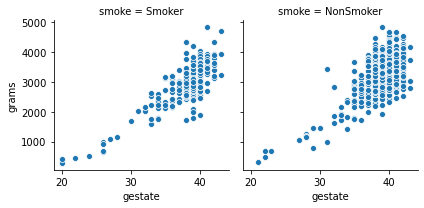

In [26]:
#Load the trees dataset
phbirths = pd.read_csv("phbirths.csv")
phbirths.head()

#NOTE: Pandas auto converts strings 'TRUE' and 'FALSE' to their boolean values. 
phbirths = phbirths.assign(smoke = ['Smoker' if a == True else 'NonSmoker' for a in phbirths['smoke']])

phbirths.head()

#a. Make two scatter plots of gestational length and birthweight for each smoking status.
#Make a facet grid for our two scatterplots
grid = sns.FacetGrid(phbirths, col='smoke')

#Now make the plots
grid.map(sns.scatterplot, "gestate", "grams")

Unnamed: 0  black  educ      smoke  gestate  grams       resid  \
0           1  False     0     Smoker       40   2898 -365.945962   
2           3  False     2  NonSmoker       38   3977  788.020444   
3           4  False     2     Smoker       37   3040  274.010970   
4           5  False     2  NonSmoker       38   3523  334.020444   
5           6  False     5     Smoker       40   3100 -163.945962   

    fittedVals        lwrCI        uprCI  
0  3263.945962  2394.206458  4133.685466  
2  3188.979556  2320.523731  4057.435381  
3  2765.989030  1892.532409  3639.445652  
4  3188.979556  2320.523731  4057.435381  
5  3263.945962  2394.206458  4133.685466   





   Unnamed: 0  black  educ      smoke  gestate  grams       resid  \
0           1  False     0     Smoker       40   2898 -365.945962   
2           3  False     2  NonSmoker       38   3977  788.020444   
3           4  False     2     Smoker       37   3040  274.010970   
4           5  False     2  NonSmoker       38  

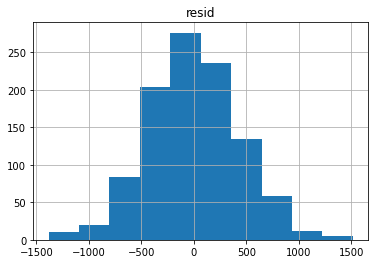

In [36]:
#b Filter results from the phbirths that are premature (less than 36weeks) to use only full term babies
phbirths = phbirths[phbirths.gestate > 35]
phbirths.head()

#c. Fit a quadratic model to the data
grams , gestate  = dmatrices('grams ~ gestate * smoke', data=phbirths, return_type='dataframe')
model = sm.OLS(grams, gestate)
fitModel = model.fit()

#d Add the model fitted values to the phbirths data frame along with the regression model confidence intervals
# Get the prediction standard as well as the lower and upper confidence intervals.
prstd, iv_l, iv_u = wls_prediction_std(fitModel)

# Make new columns for the fittedValues and CIs. 
phbirths['fittedVals'] = fitModel.fittedvalues
phbirths['lwrCI'] = iv_l
phbirths['uprCI'] = iv_u

print(phbirths.head(), "\n\n\n\n\n")

#e. Add layers to the two scatterplot graphs for the model fits and uncertatinties
# I couldn't get this to work properly unfortunately. 
#g = sns.FacetGrid(phbirths, col="smoke", margin_titles=True, height=4)
#g.map(plt.scatter, "grams", "gestate", color="#338844", edgecolor="white", s=50, lw=1)
#for ax in g.axes.flat:
#    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
#g.set(xlim=(0, 60), ylim=(0, 14)) 

#f. Create a column for residuals in the phbirths data set
phbirths['resid'] = fitModel.resid
print(phbirths.head())

histogramResid = phbirths.hist('resid')
